In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
path = '../cs5228-2310-final-project/'
df_train = pd.read_csv('/kaggle/input/cs5228-2310-final-team31/train.csv')
df_test = pd.read_csv('/kaggle/input/cs5228-2310-final-team31/test.csv')

In [9]:
df_train

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200
59996,2023-04,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100
59997,2022-06,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250
59998,2023-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700


<Axes: xlabel='floor_area_sqm', ylabel='monthly_rent'>

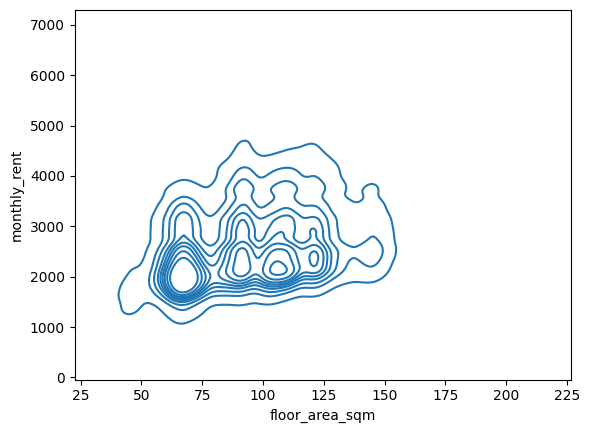

In [10]:
sns.kdeplot(x = "floor_area_sqm", y = "monthly_rent", data = df_train)

In [18]:
# 转换为日期时间格式
df_train['rent_approval_date'] = pd.to_datetime(df_train['rent_approval_date'])

# 提取年份和月份
df_train['rent_approval_year'] = df_train['rent_approval_date'].dt.year
df_train['rent_approval_month'] = df_train['rent_approval_date'].dt.month

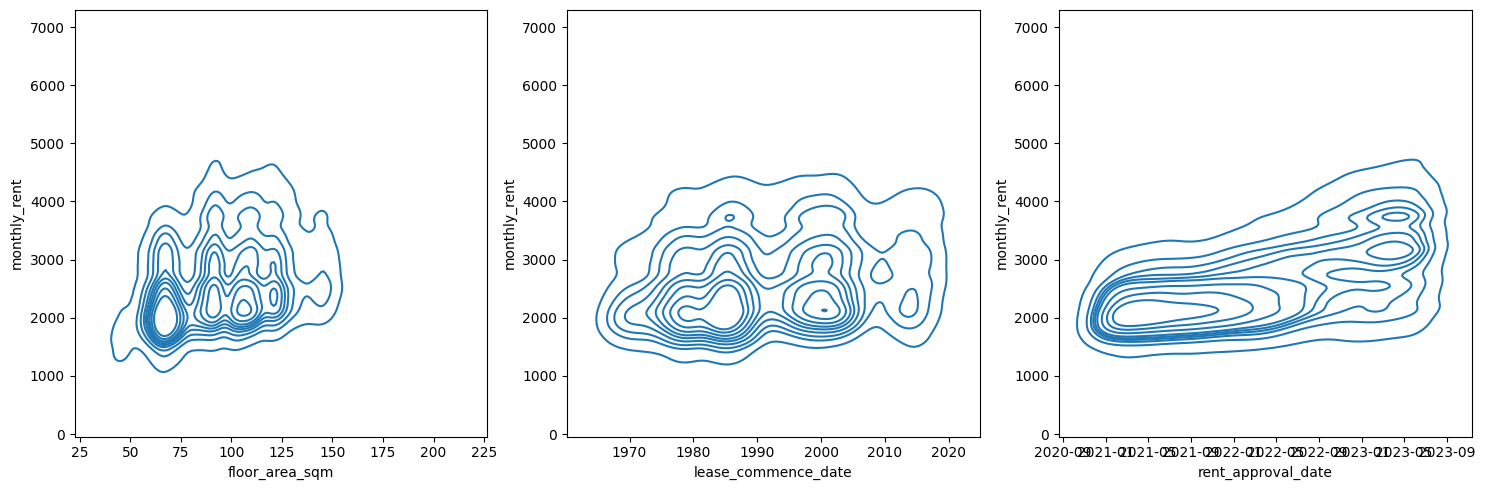

In [19]:
# 设置子图布局
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制KDE图
sns.kdeplot(x = "floor_area_sqm", y = "monthly_rent", data = df_train, ax=axes[0])
sns.kdeplot(x = "lease_commence_date", y = "monthly_rent", data = df_train, ax=axes[1])
sns.kdeplot(x = "rent_approval_date", y = "monthly_rent", data = df_train, ax=axes[2])

# 调整子图间距
plt.tight_layout()

In [21]:
# 调整x轴刻度和标签
plt.sca(axes[2])
plt.xticks(rotation=45)

(array([18506., 18628., 18748., 18871., 18993., 19113., 19236., 19358.,
        19478., 19601.]),
 [Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05'),
  Text(19601.0, 0, '2023-09')])

In [24]:
plt.savefig('/kaggle/working/kde_numeric.png')